# Multivariate Linear Regression: Student Scores

In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression). The data includes information about student including the following:

- Hours Studied : The time a student spent studying in hours 
- Previous Scores: The score that a student scored in the previous exam
- Sleep Hours: The time a student slept
- Sample Question Papers Practiced: Amount of question papers a student practiced

In this project we going to predict what scores the student will score in the exam depending on those data. 

### Important libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Let's read the data and make sense of them

In [2]:
student_data = pd.read_csv('Data/Student_Performance.csv')

In [3]:
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
student_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Let explore some analysis of the data

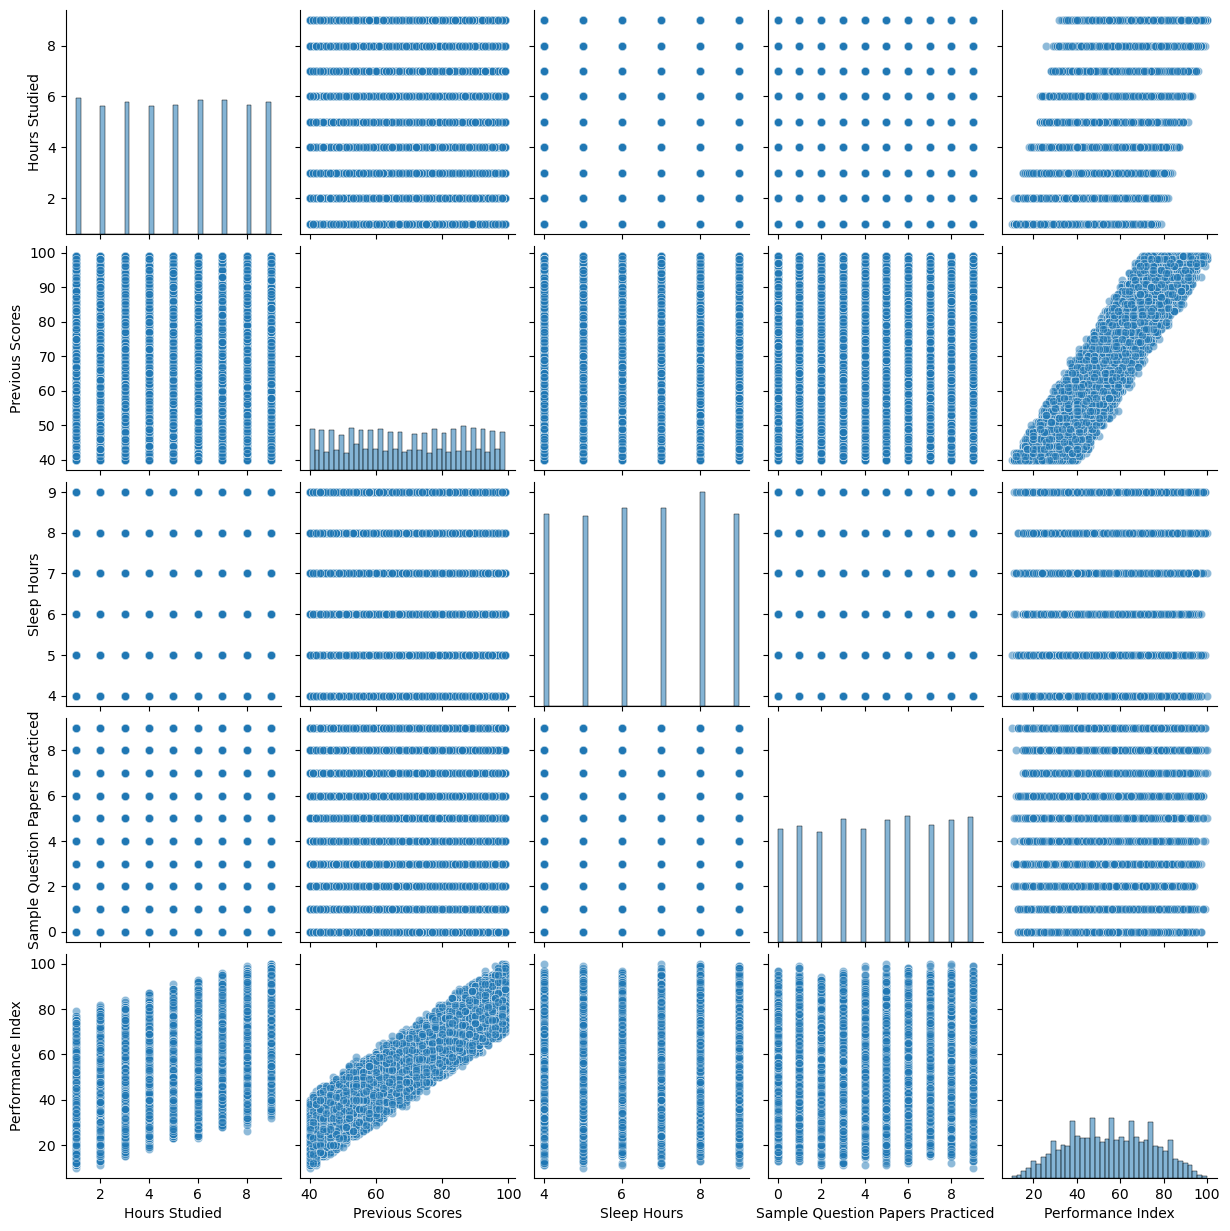

In [6]:
sns.pairplot(student_data, kind='scatter', plot_kws={'alpha':0.5}, diag_kws={'alpha':0.55, 'bins':40})

#### Let's split the data

In [8]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
X = student_data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]

y = student_data['Performance Index']

In [10]:
X.head()
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Let's train the model

In [13]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_model.coef_

array([2.85289351, 1.01703572, 0.47331832, 0.19172629])

In [16]:
coefData = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coef'])
print(coefData)

                                      Coef
Hours Studied                     2.852894
Previous Scores                   1.017036
Sleep Hours                       0.473318
Sample Question Papers Practiced  0.191726


### Let's use the test data to test the prediction

In [17]:
predictions = lr_model.predict(X_test)

In [18]:
predictions

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491])

Text(0.5, 1.0, 'Examination Index vs Model Prediction')

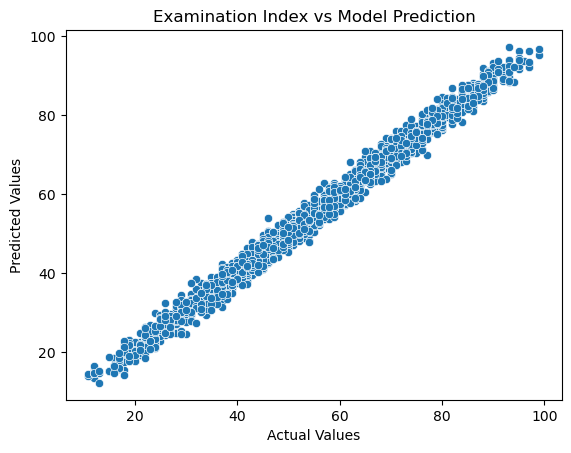

In [20]:
# Scatter plot of values of y and predicted values

sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Examination Index vs Model Prediction')

### let's check the r2_score of the model

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2 = r2_score(y_test, predictions)

print(f"The r2_score of the model: {r2}")

The r2_score of the model: 0.9887144552384186


### Another Evaluation of the model by find mean squared error and mean absolute error

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.6296726874197032
Mean Squared Error: 4.182254914593825
Root Mean Squared Error: 2.045056213064527


### Let's save the model

In [25]:
import pickle

with open('models/multivariatemodel.pkl', 'wb') as file:
  pickle.dump(lr_model, file)

## Conclusion

This model scored a really high r2_score of 0.98 which show that it's prediction is actually really good and with the look of mean absolute error which is 1.62 meaning I am giving an error of 1.62 to my prediction while the score is between 0 to 100 which show that it is not a big error, so this model can be used now for some prediction